Kalman Filter (KF) Lab
-----

We are going to refactor some "classic" python into the modern era.

By The End Of This Session You Should Be Able To:
----

- Implement Kalman Filter to filter 1 dimensional data
- Practice OOP
- Practice reading and refactoring other people's code

-----
Andrew D. Straw did a fine implementation of KF as seen [here](http://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html) and below

From http://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf
example given in pages 11-15 of "An Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
University of North Carolina at Chapel Hill, Department of Computer
Science, TR 95-041

In [6]:
reset -fs

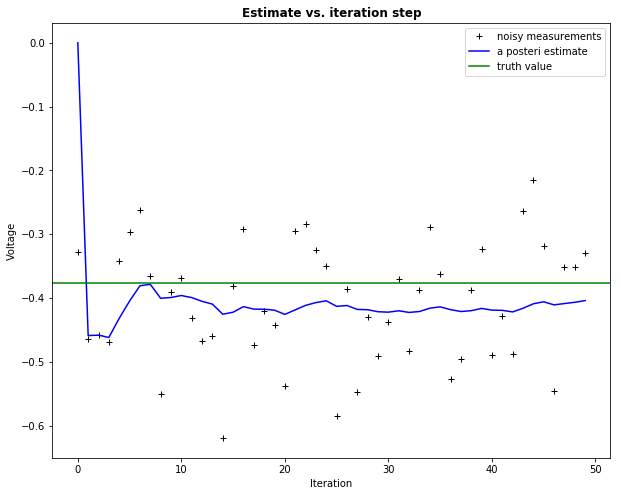

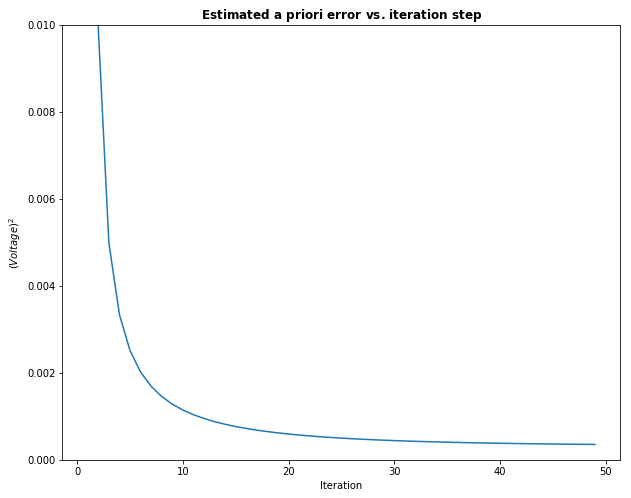

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

-----

![](http://blog.kdheepak.com/images/raymondhettinger.jpg)


__TODO__: Rename the variables

Make them more descriptive (and yes, longer) based on the comments.

<br>
<details><summary>
Click here for a hint…
</summary>
Look at my starter class code for ideas
</details>

In [ ]:
# Solution:

import numpy
import pylab

# intial parameters
iteration_count = 50
empty_iteration_tuple = (iteration_count,)  # size of array
actual_value = -0.37727  # truth value
noisy_measurement = numpy.random.normal(actual_value, 0.1, size=empty_iteration_tuple)  # observations (normal about x, sigma=0.1)

process_variance = 1e-5  # process variance

# allocate space for arrays
posteri_estimate = numpy.zeros(empty_iteration_tuple)
posteri_error_estimate = numpy.zeros(empty_iteration_tuple)
priori_estimate = numpy.zeros(empty_iteration_tuple)
priori_error_estimate = numpy.zeros(empty_iteration_tuple)
blending_factor = numpy.zeros(empty_iteration_tuple)

estimated_measurement_variance = 0.1 ** 2  # estimate of measurement variance, change to see effect

# intial guesses
posteri_estimate[0] = 0.0
posteri_error_estimate[0] = 1.0

for iteration in range(1, iteration_count):
    # time update
    priori_estimate[iteration] = posteri_estimate[iteration - 1]
    priori_error_estimate[iteration] = posteri_error_estimate[iteration - 1] + process_variance

    # measurement update
    blending_factor[iteration] = priori_error_estimate[iteration] / (priori_error_estimate[iteration] + estimated_measurement_variance)
    # noisy measurement is the only thing where we need the entire list
    posteri_estimate[iteration] = priori_estimate[iteration] + blending_factor[iteration] * (noisy_measurement[iteration] - priori_estimate[iteration])
    posteri_error_estimate[iteration] = (1 - blending_factor[iteration]) * priori_error_estimate[iteration]

pylab.figure()
pylab.plot(noisy_measurement, 'k+', label='noisy measurements')
pylab.plot(posteri_estimate, 'b-', label='a posteri estimate')
pylab.axhline(actual_value, color='g', label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')
pylab.show()

__TODO__: KF only need plain POPO (Plain Old Python Objects). Get rid of all the numpy arrays and __only__ track only the previous value.

In [ ]:
# Solution

import random

# intial parameters
iteration_count = 500
actual_values = [-0.37727 + j * j * 0.00001 for j in xrange(iteration_count)]
noisy_measurement = [random.random() * 0.6 - 0.3 + actual_val for actual_val in actual_values]

process_variance = 1e-5  # process variance

estimated_measurement_variance = 0.1 ** 2  # estimate of measurement variance, change to see effect

# allocate space for arrays
posteri_estimate_for_graphing = []

# intial guesses
posteri_estimate = 0.0
posteri_error_estimate = 1.0

for iteration in range(1, iteration_count):
    # time update
    priori_estimate = posteri_estimate
    priori_error_estimate = posteri_error_estimate + process_variance

    # measurement update
    blending_factor = priori_error_estimate / (priori_error_estimate + estimated_measurement_variance)
    posteri_estimate = priori_estimate + blending_factor * (noisy_measurement[iteration] - priori_estimate)
    posteri_error_estimate = (1 - blending_factor) * priori_error_estimate
    posteri_estimate_for_graphing.append(posteri_estimate)

import pylab
pylab.figure()
pylab.plot(noisy_measurement, color='r', label='noisy measurements')
pylab.plot(posteri_estimate_for_graphing, 'b-', label='a posteri estimate')
pylab.plot(actual_values, color='g', label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')
pylab.show()

___TODO__: That was Data Analyst style code. We are can be ML Engineers!!! Let's make a reusable class

In [17]:
class KalmanFilter:
    "https://en.wikipedia.org/wiki/Kalman_filter"
    
    def __init__(self, process_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def input_latest_noisy_measurement(self, measurement):
        priori_estimate = None
        priori_error_estimate = None
        blending_factor = None
        self.posteri_estimate = None
        self.posteri_error_estimate = None 

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

In [25]:
# Solution

class KalmanFilter:
    "https://en.wikipedia.org/wiki/Kalman_filter"
    
    def __init__(self, process_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def input_latest_noisy_measurement(self, measurement):
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance
        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate + blending_factor * (measurement - priori_estimate)
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

In [ ]:
import random

In [27]:
iteration_count = 500

actual_values = [-0.37727 + _ * _ * 0.00001 for _ in range(iteration_count)] # More interesting fake data; Always & Up to the right
noisy_measurement = [random.random() * 2.0 - 1.0 + actual_val for actual_val in actual_values] # Way more noise; Turn it up to 11!
measurement_standard_deviation = numpy.std([random.random() * 2.0 - 1.0 for j in range(iteration_count)])

process_variance = 1e-3 # The smaller this number, the fewer fluctuations, but can also venture off course...
estimated_measurement_variance = measurement_standard_deviation ** 2

In [29]:
kalman_filter = KalmanFilter(process_variance, estimated_measurement_variance)
posteri_estimate_graph = []

for iteration in range(1, iteration_count):
    kalman_filter.input_latest_noisy_measurement(noisy_measurement[iteration])
    posteri_estimate_graph.append(kalman_filter.get_latest_estimated_measurement())

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

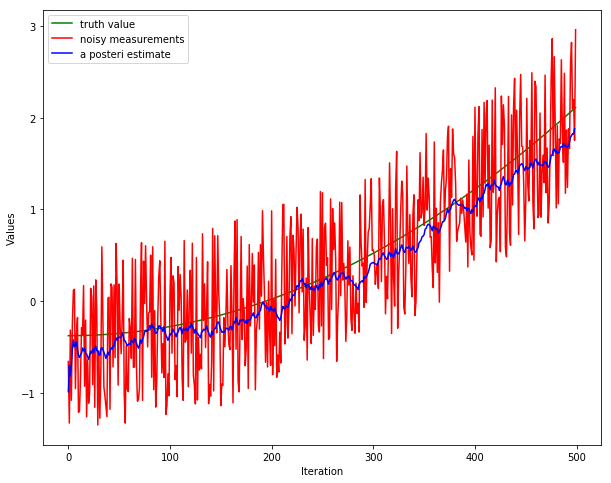

In [36]:
# Plot it up
plt.plot(actual_values, color='g', label='truth value')
plt.plot(noisy_measurement, color='r', label='noisy measurements')
plt.plot(posteri_estimate_graph, color='b', label='a posteri estimate')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.show()

__TOD0__: Did your Kalman filter do well in filtering out the noise?

__Solution__: Heck Yes! It was very close to the truth function, mostly underestimating it

Refactoring is fun (but dangerous work)

![](http://ljdchost.com/XgodwMJ.gif)

__TODO__: Reflect and summarize how the refactoring went. What was easy? What as a challenge? What did you spend the most time on?

-----
Challenge Activities
----

IPython and Sympy to Develop a Kalman Filter for Multisensor Data Fusion
--------

Work through this [notebook](https://github.com/balzer82/PyData-Berlin-2014-Kalman)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("XSRr2HHedrY")

<br>
<br> 
<br>

----